# import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(" nsucess")

 nsucess


In [3]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\outliers\\placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

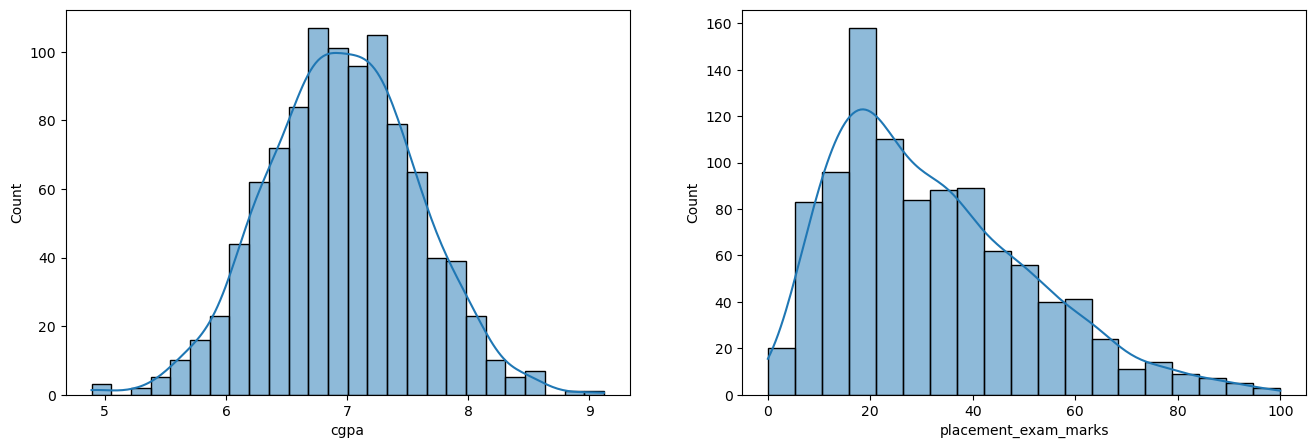

In [53]:
# see the distributions of the datas 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.show()
# cgpa is normally distruiibuted and the placement marks are distributed log 

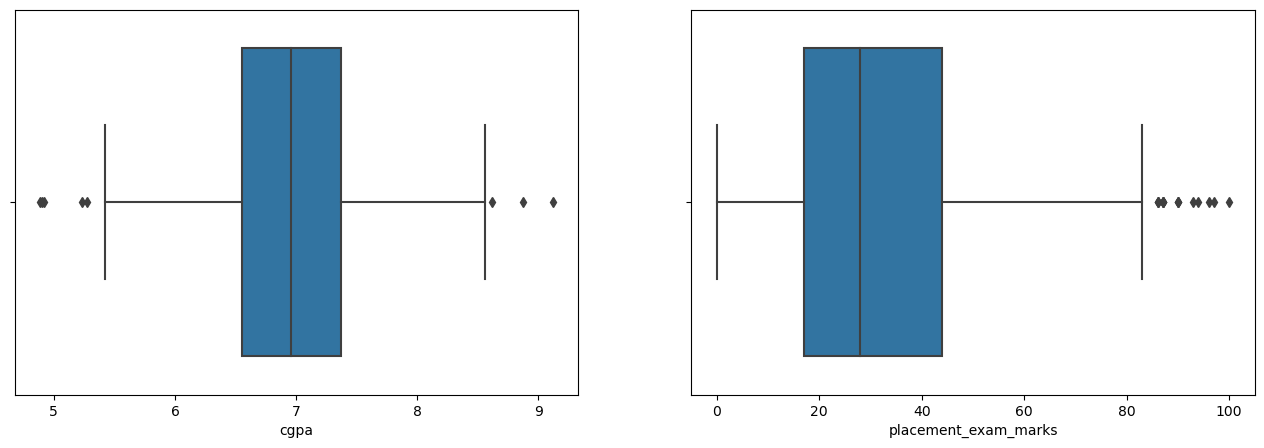

In [32]:
# box plot show 
 #sns.boxplot(data=data)
gpa=df['cgpa']
marks=df['placement_exam_marks']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=gpa)


plt.subplot(1,2,2)
sns.boxplot(data=df, x=marks)
plt.show()

# the diamond are the outliers 

In [18]:
# skew function will give the information about the nortmal distributions 
print(df['cgpa'].skew())  # close to the zero this is in the normal distributions 
df['placement_exam_marks'].skew()  # positive this is righrt skewed datass 

-0.014529938929314918


0.8356419499466834

In [21]:
df[['cgpa','placement_exam_marks']].describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


In [36]:
# detect the outliers in the cgpa 
print(" mean ",df['cgpa'].mean())
print(" std ",df['cgpa'].std())
print(" min ",df['cgpa'].min())
print(" max ",df['cgpa'].max())

 mean  6.96124000000001
 std  0.6158978751323894
 min  4.89
 max  9.12


In [23]:
# findings the boundary values 
print(" highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest  allowed",df['cgpa'].mean()-3*df['cgpa'].std())

 highest allowed 8.808933625397177
lowest  allowed 5.113546374602842


In [24]:
# code to find the outliers  --. all the values below 5.5 and the greater than 8.8 are outliers 
df[(df['cgpa']>8.80893)| (df['cgpa']<5.11354)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [25]:
# find how many outliers present in the cgpa datasets 
len(df[(df['cgpa']>8.80893)| (df['cgpa']<5.11354)])

5

In [27]:
# trimming the outliers  --> completely remove the outliers  
new_df=df[(df['cgpa']>5.1135) & (df['cgpa']<8.80)]

In [29]:
print(new_df.shape)
df.shape


(995, 3)


(1000, 3)

In [30]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [ ]:
# plotting the box plot beforea and after the outliers 

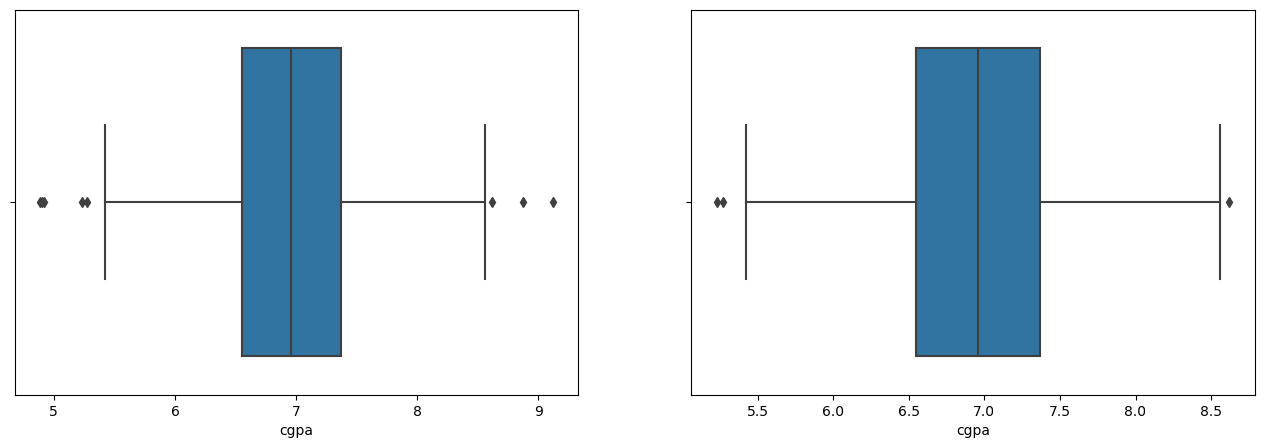

In [33]:
#sns.boxplot(x="cgpa",  data=new_df)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df['cgpa'])


plt.subplot(1,2,2)
sns.boxplot(data=new_df, x=new_df['cgpa'])
plt.show()
# there are some values why dont they removed --> error 

In [50]:
# chyeck the skewness value before and after removings the outliers 
print(" before --> ",df['cgpa'].skew())
print(" after --> ", new_df['cgpa'].skew())
print(" difference ",df['cgpa'].skew()- new_df['cgpa'].skew())

 before -->  -0.014529938929314918
 after -->  0.016217253033528983
 difference  -0.030747191962843902


In [34]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [37]:
# detect the outliers in the placement examed marks --> placement_exam_marks

print(" mean ",df['placement_exam_marks'].mean())
print(" std ",df['placement_exam_marks'].std())
print(" min ",df['placement_exam_marks'].min())
print(" max ",df['placement_exam_marks'].max())

 mean  32.225
 std  19.13082233892108
 min  0.0
 max  100.0


In [38]:
# findings the boundary values 
print(" highest allowed",df['placement_exam_marks'].mean()+3*df['placement_exam_marks'].std())
print("lowest  allowed",df['placement_exam_marks'].mean()-3*df['placement_exam_marks'].std())

 highest allowed 89.61746701676324
lowest  allowed -25.167467016763247


In [42]:
# code to find the outliers  --. all the values below -25.16 and the greater than 89.61 are outliers 
df[(df['placement_exam_marks']<-25.16)| (df['placement_exam_marks']>89.61)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


In [44]:
# find the total numbers of the outliers 
len(df[(df['placement_exam_marks']<-25.16)| (df['placement_exam_marks']>89.61)])
# there are 8 outliers 

8

In [45]:
# completely remove the outliers datas
pexam=df[(df['placement_exam_marks']>-25.16)& (df['placement_exam_marks']<89.61)]

In [46]:
len(pexam)

992

In [48]:
pexam[['placement_exam_marks']].describe()

,placement_exam_marks
count,992.000000
mean,31.728831
std,18.385876
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,87.000000


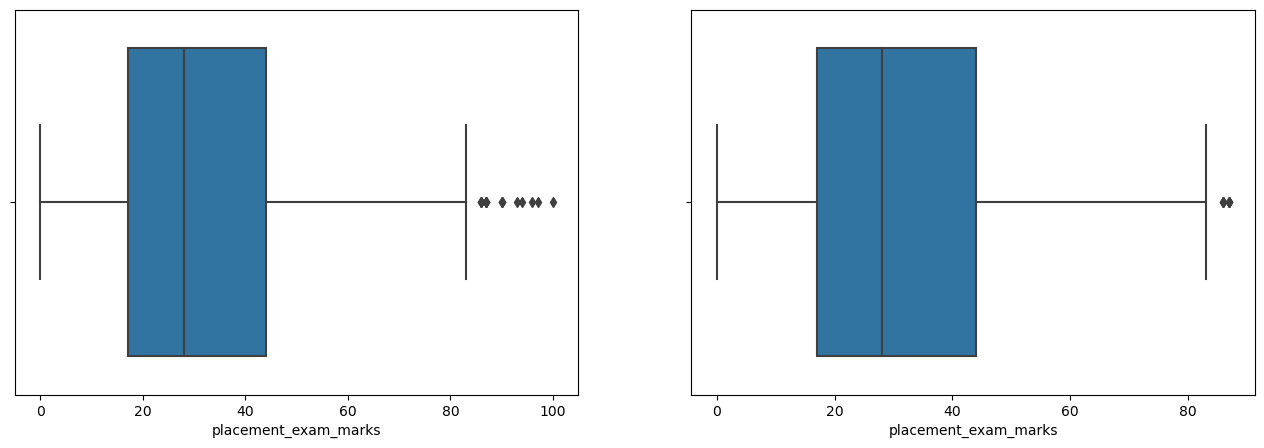

In [49]:
# now show the difference using the box plots before and after the removiongs outliers 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df['placement_exam_marks'])


plt.subplot(1,2,2)
sns.boxplot(data=new_df, x=pexam['placement_exam_marks'])
plt.show()

In [51]:
# before and after the skewnesss of the placements marks exams 
print(" before --> ",df['placement_exam_marks'].skew())
print(" after --> ", pexam['placement_exam_marks'].skew())
print(" difference ",df['placement_exam_marks'].skew()- pexam['placement_exam_marks'].skew())

# here aft6er removing the outliers we have decrease the skewness values from the datasets 

 before -->  0.8356419499466834
 after -->  0.7240892372721492
 difference  0.11155271267453415


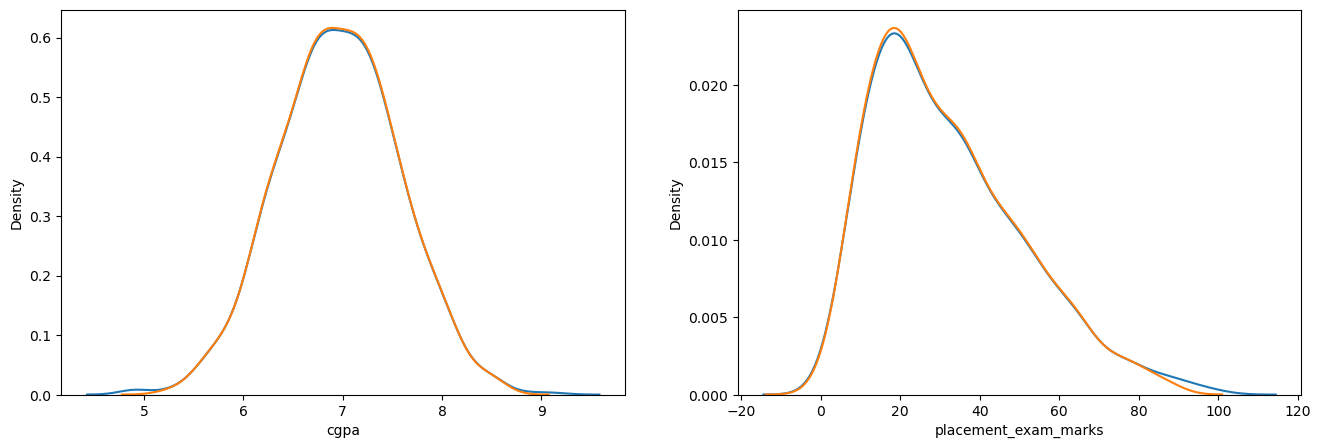

In [59]:
# comnparisons of the kde cvalue before and after removings the outliers 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df, x="cgpa")
sns.kdeplot(data=new_df, x="cgpa")

plt.subplot(1,2,2)
sns.kdeplot(data=df, x="placement_exam_marks")
sns.kdeplot(data=pexam, x="placement_exam_marks")
plt.show()
# blue line is the original data 
# the orange line is the new data after triming the outliersss

# approach 2 to calculate the z score

In [64]:
# formula --> x-mue/ std

df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [65]:
df.head()  # here we mnake the new completly 1 value which is the z score value of the cgpa

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
0,7.19,26.0,1,0.371425,-25.355822
1,7.46,38.0,1,0.809810,-13.355822
2,7.54,40.0,1,0.939701,-11.355822
3,6.42,8.0,1,-0.878782,-43.355822
4,7.23,17.0,0,0.436371,-34.355822


In [66]:
# like we have to calculate the cgpa cvalue foe the placement exam marks also
df['placement_zscore']=(df['placement_exam_marks']-df['placement_exam_marks'].mean())/df['placement_exam_marks'].std()

In [67]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore,placement_zscore
0,7.19,26.0,1,0.371425,-0.325391
1,7.46,38.0,1,0.809810,0.301869
2,7.54,40.0,1,0.939701,0.406412
3,6.42,8.0,1,-0.878782,-1.266281
4,7.23,17.0,0,0.436371,-0.795836


In [69]:
# now detect the outliers from the datas   
# trimming --> completely remove the outliers from the datas 
new_df=df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]
len(new_df)  # there are 5 outliers treated in the cgpa score

995

In [71]:
# detrect the outliers in the placements scores
new_df=df[(df['placement_zscore']<3) & (df['placement_zscore']>-3)]
len(new_df) # there are 8 outliers in the placements_z score   datas 

992

# capping the data -- left outlier min value , right outlier max value

In [84]:
# demostration for the cgpa
upper_limit=df['cgpa'].mean() +3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() -3*df['cgpa'].std()
print(upper_limit)
print(lower_limit)

8.799563584169274
5.1234334285799505


In [85]:
# np.where(condition , replace thevalue if the value is true , replace the value if the value false)
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where
                        (df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [86]:
df.shape

(1000, 5)

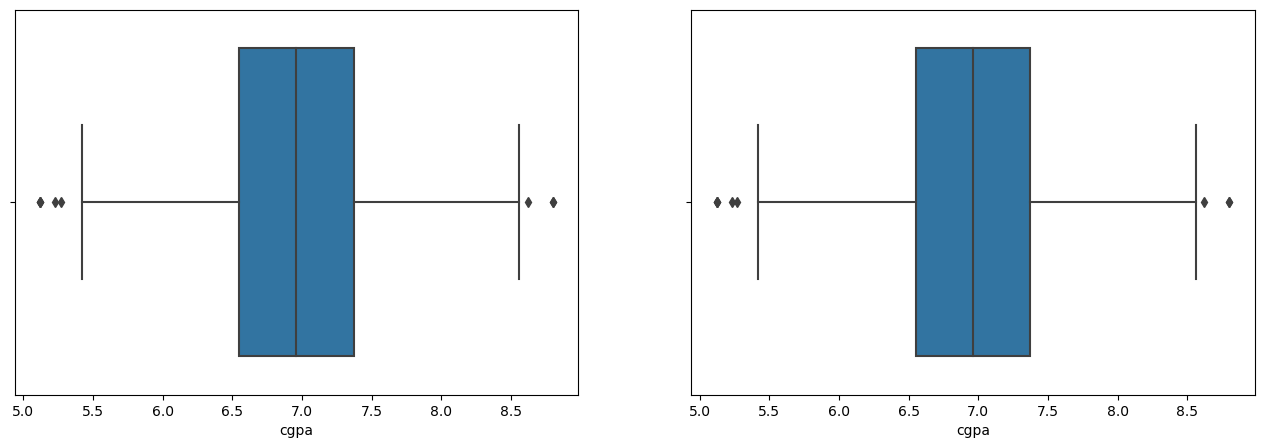

In [87]:
# too see the kde plot of the capping and the outliers in the box plot and the kde plots 
# box p-lots 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df['cgpa'])


plt.subplot(1,2,2)
sns.boxplot(data=df, x=df['cgpa'])
plt.show()

In [89]:
df[['cgpa']].describe()

,cgpa
count,1000.000000
mean,6.961509
std,0.612543
min,5.123433
25%,6.550000
50%,6.960000
75%,7.370000
max,8.799564


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

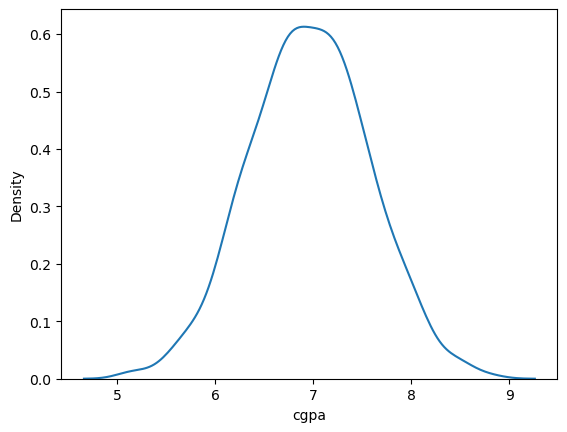

In [91]:
sns.kdeplot(data=df, x="cgpa")

In [92]:
# cghange in the skewness   0f the cgpa 
-0.014529938929314918-df['cgpa'].skew()

-0.01125521846877586

In [93]:
-0.014529938929314918--0.014529938929314918

0.0